In [1]:
import os
import torch
import torch.nn as nn
import rasterio
import tifffile as tiff
from torchvision import models
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from rasterio.features import shapes
from rasterio.transform import from_bounds

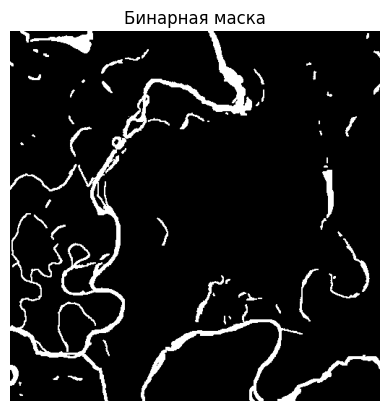

In [16]:
def plot_binary_mask(mask_path):
    mask = tiff.imread(mask_path)
    mask = (mask > 0.05).astype(np.uint8)
    
    plt.imshow(mask, cmap='gray')
    plt.title('Бинарная маска')
    plt.axis('off')
    plt.show()

mask_path = 'train/masks/9_1.tif'
plot_binary_mask(mask_path)

# Как пользоваться сриптом
### Для активации окружения в консоли: 
source environments/hack/bin/activate
### Для вызова инференса:
python process_image.py путь_к_исходной.tif путь_к_выходной_маске.tif --threshold X.X (Необязательный параметр, дефолт 0.2)

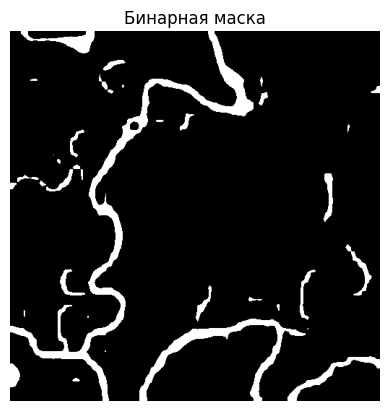

In [72]:
plot_binary_mask('output/new_model_9_1.tif')

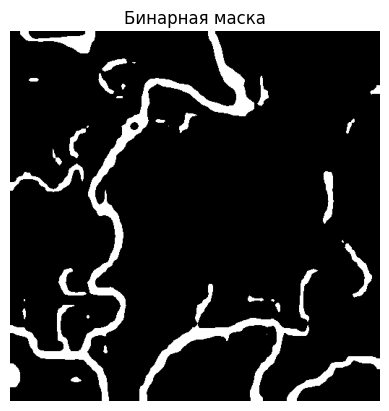

In [76]:
plot_binary_mask('output/new_model_9_1_tresh_0_1.tif')

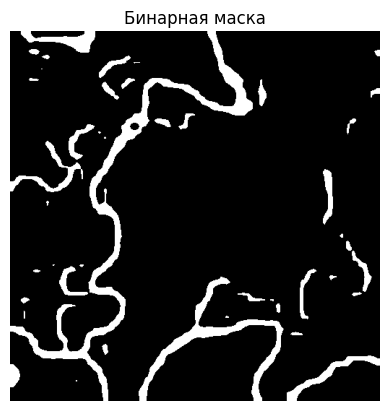

In [75]:
plot_binary_mask('output/9_1_infered.tif')

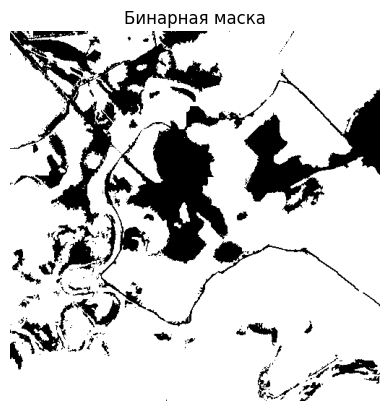

In [11]:
plot_binary_mask('train/masks/9_2.tif')

In [90]:
from calculate_metrics import calculate_f1_score

In [3]:
calc.calculate_f1_score("dir1", "dir2")

/home/user1/environments/hack/lib/python3.10/site-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/user1/environments/hack/lib/python3.10/site-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/user1/environments/hack/lib/python3.10/site-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


0.8382079993032614
0.8435134477814781
0.8302278628267816
[np.float64(0.8382079993032614), np.float64(0.8435134477814781), np.float64(0.8302278628267816)]


[np.float64(0.8382079993032614),
 np.float64(0.8435134477814781),
 np.float64(0.8302278628267816)]

In [1]:
import calculate_metrics as calc

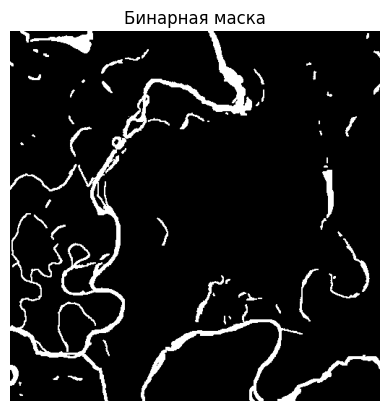

In [22]:
def plot_inference(mask_path, model = ''):
    mask = tiff.imread(mask_path)

    flipped_mask = np.fliplr(mask)
    rotated_mask = np.rot90(flipped_mask, k=1)
    
    plt.imshow(rotated_mask, cmap='gray')
    plt.title(f'Бинарная маска {model}')
    plt.axis('off')
    plt.show()

mask_path = 'train/masks/9_1.tif'
plot_binary_mask(mask_path)

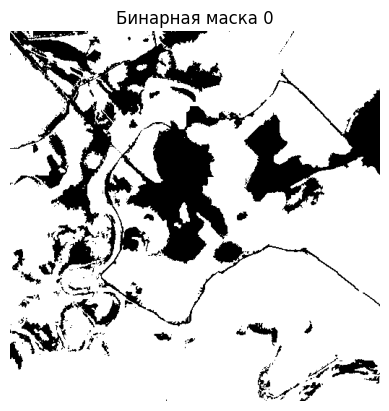

In [12]:
plot_binary_mask('train/masks/9_2.tif')

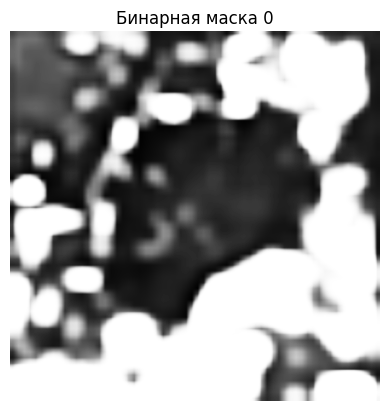

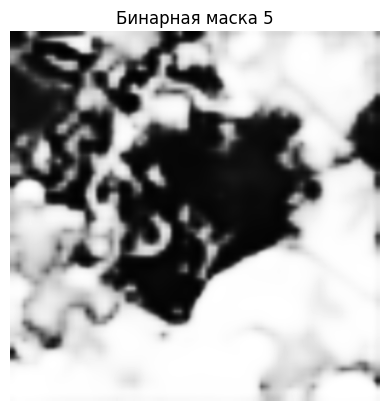

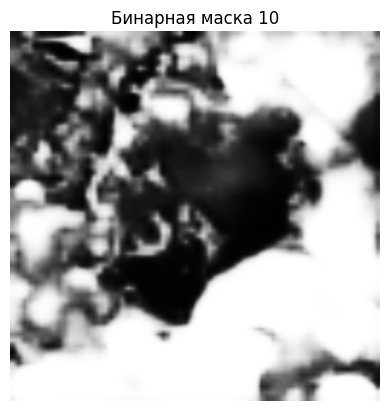

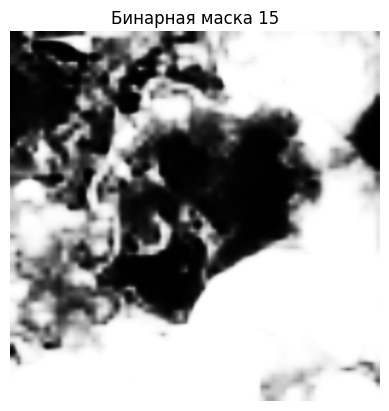

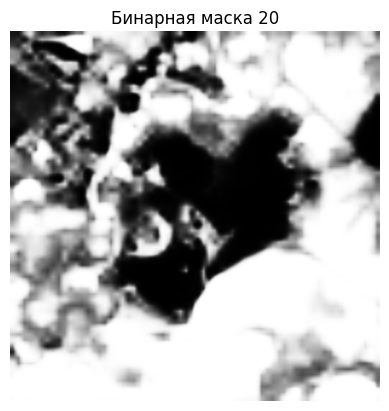

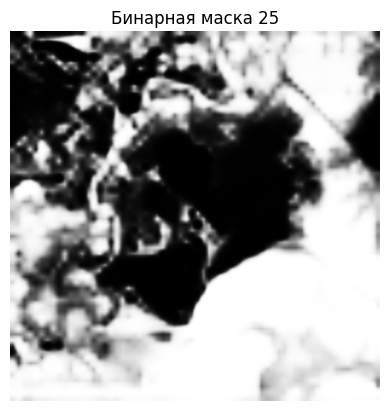

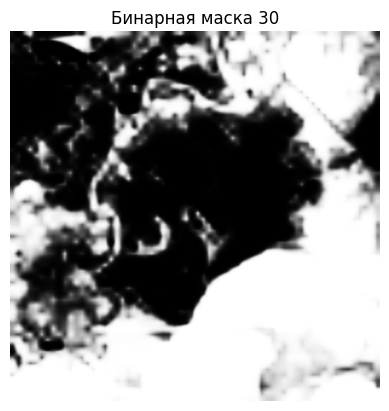

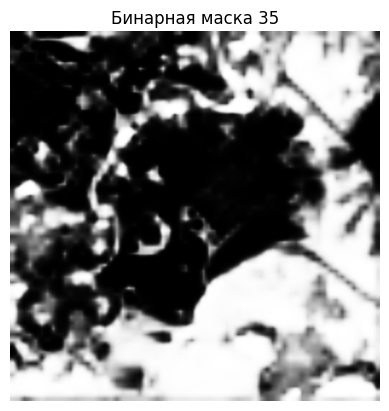

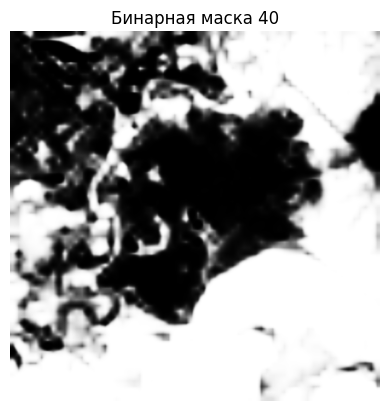

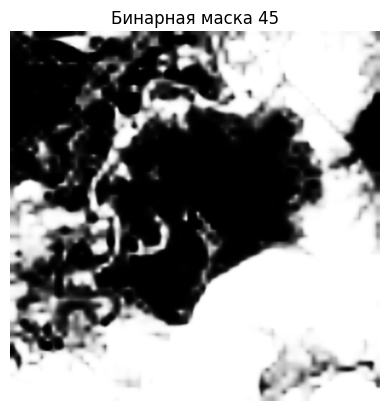

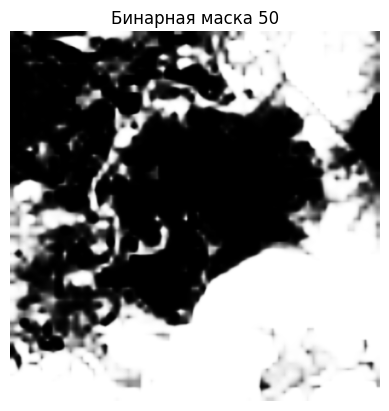

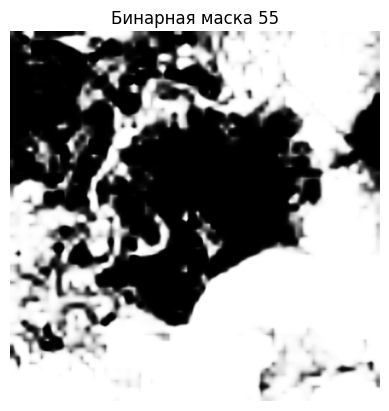

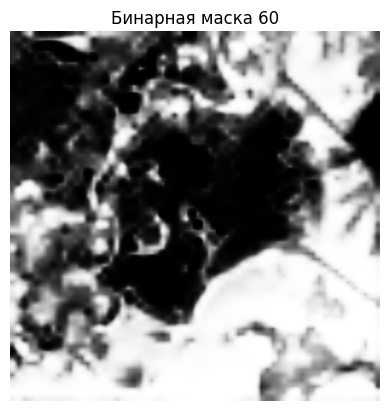

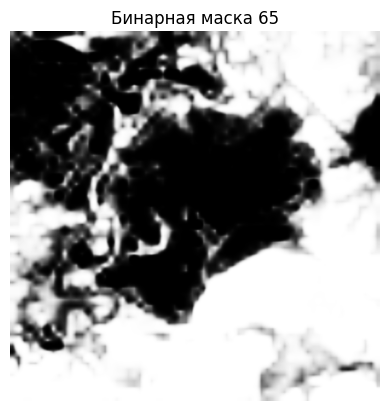

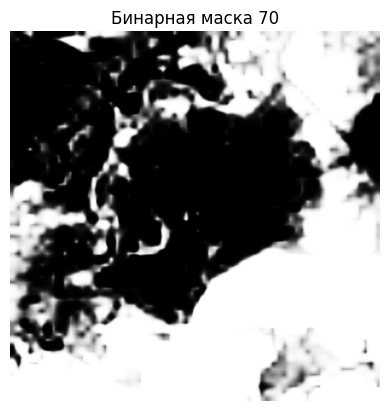

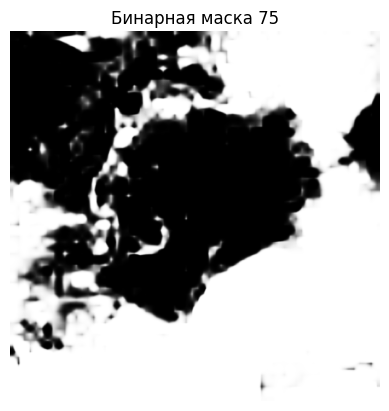

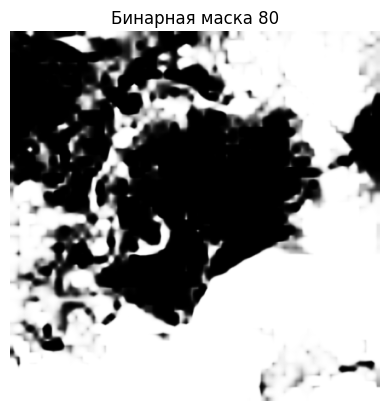

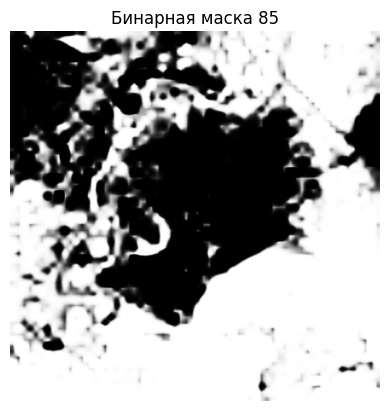

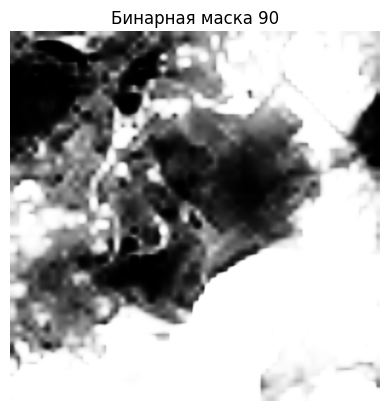

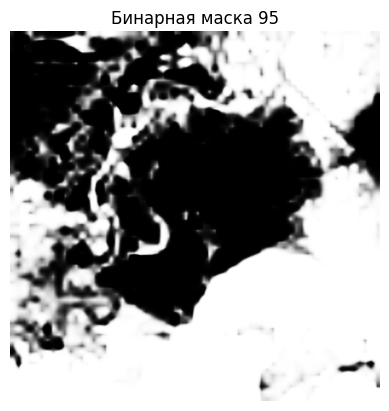

In [25]:
for i in range(0,96,5):
    plot_inference(f'bench_masks/mask_{i}_2-nonbinary.tif', int(i))

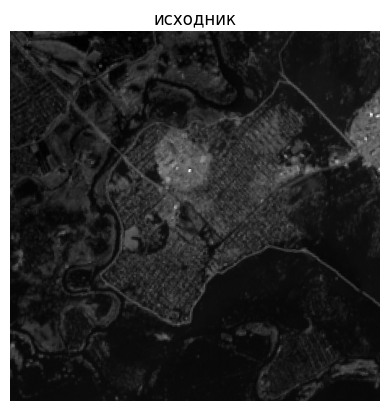

In [34]:
with rasterio.open(r'train/images/9_2.tif') as src:
    uv = src.read(8)
plt.imshow(uv, cmap='gray')
plt.title('исходник')
plt.axis('off')
plt.show()


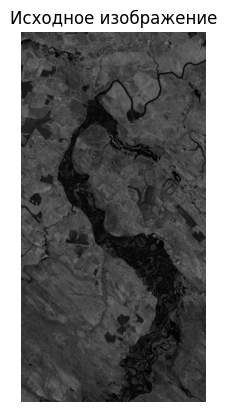

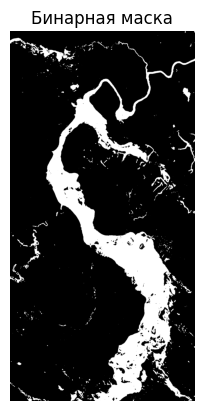

In [60]:
with rasterio.open(r'test_scoltech/images/4.tif') as src:
    uv = src.read(8)*1.
plt.imshow(uv, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

plt.imshow(tiff.imread('test_output_masks/4.tif'), cmap='gray')
plt.title('Бинарная маска')
plt.axis('off')
plt.show()


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2456, 'height': 4911, 'count': 10, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0001580317589576546, 0.0, 100.440445,
       0.0, -8.836122989207793e-05, 54.649008)}


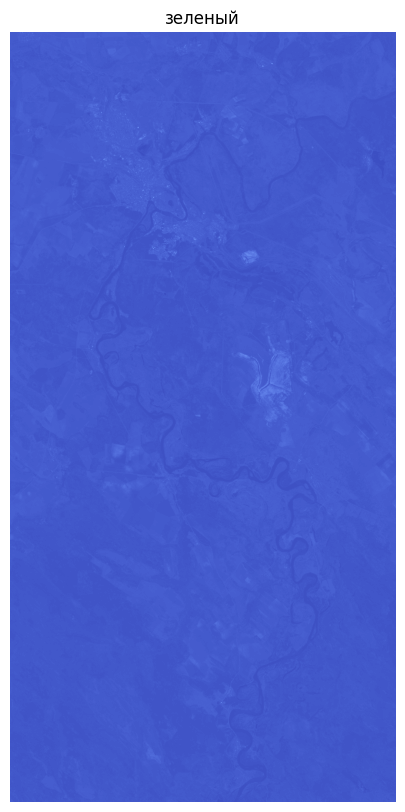

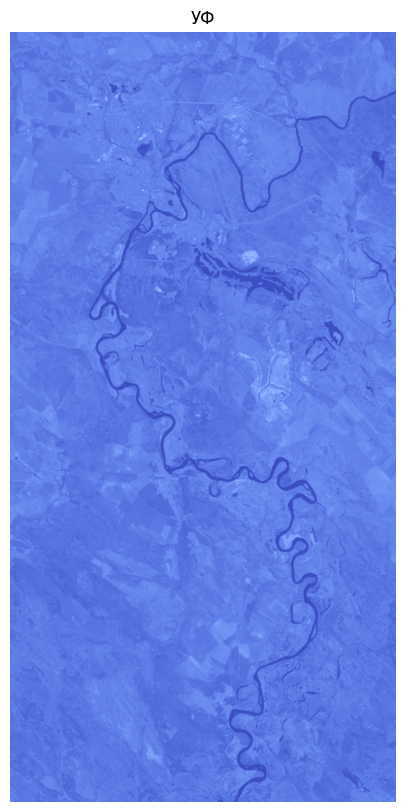

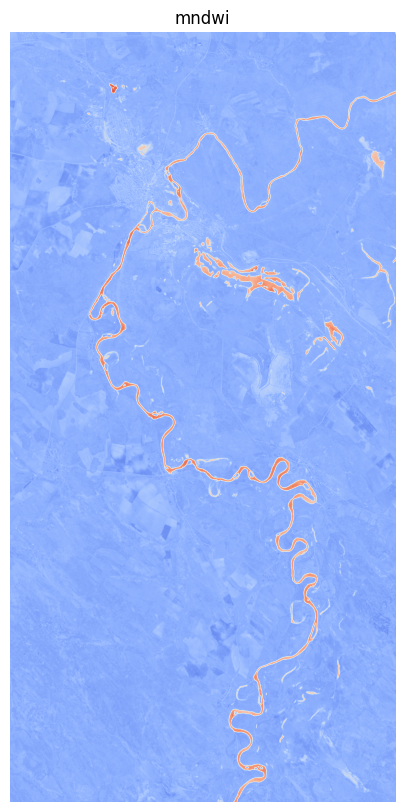

In [53]:
with rasterio.open('test_scoltech/images/3.tif') as src:
    print(src.meta)
    green_band = src.read(2).astype(float)
    swir_band = src.read(9).astype(float)
    
plt.figure(figsize=(10, 10))
plt.imshow(green_band, cmap='coolwarm')
plt.title('зеленый')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(swir_band, cmap='coolwarm')
plt.title('УФ')
plt.axis('off')
plt.show()

mndwi = (green_band - swir_band) / (green_band + swir_band + 1e-10)

plt.figure(figsize=(10, 10))
plt.imshow(mndwi, cmap='coolwarm')
plt.title('mndwi')
plt.axis('off')
plt.show()
